In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Langevin Sampling

```
t = 0
X_0 = N(0,1)

for t -> 0 to 1000:
    Z_t = N(0,1)
    X_t+1 = X_t + (sig/2) * F(X_t) + sqrt(sig) * Z_t

return X_1000
```

X_1000 ~ P_x(X)

Here F(X) = M'(X) (Where M(X) = log P_x(X)) (F(X) tells the direction of increase of likelihood given the Probability Density Function)

In [16]:
samples = np.random.uniform(0,1,30000000)

In [17]:
def generate_dice_samples(samples):
    result=[]
    for sample in samples:
        if 0 <= sample <= 1/6:
            result.append(1)
        elif 1/6 < sample <= 2/6:
            result.append(2)
        elif 2/6 < sample <= 3/6:
            result.append(3)
        elif 3/6 < sample <= 4/6:
            result.append(4)
        elif 4/6 < sample <= 5/6:
            result.append(5)
        elif 5/6 < sample <= 1:
            result.append(6)
    return result

def plot_samples_histogram(samples):
    plt.figure()
    plt.hist(samples)
    plt.xlabel("Samples")
    plt.ylabel("Freq")
    plt.show()

In [ ]:
samples = generate_dice_samples(samples)
plot_samples_histogram(samples)

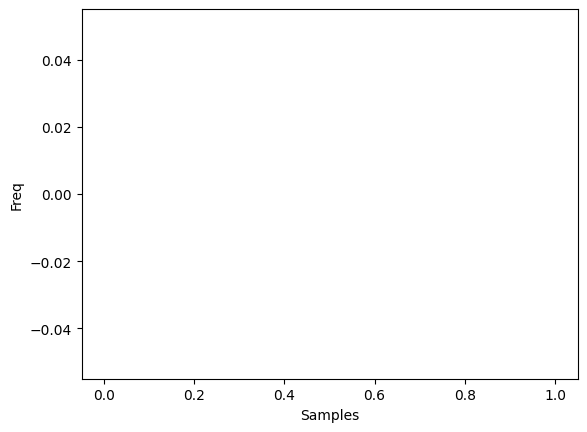

In [9]:
def F(x):
    if 0 <= x <= 1:
        return 0
    elif x < 0:
        return -x
    else:
        return -x

def Langevin_sampling(sig = 0.001):
    
    x = np.random.uniform(0,1,1)
    for i in range(10000):
        zi = np.random.uniform(0,1,1)
        x = x + F(x) + np.sqrt(sig) * zi
    return x

def dice_sampling(size):
    samples = []
    for _ in range(size):
        samples.append(Langevin_sampling())
    return samples

samples = dice_sampling(1000)
samples = generate_dice_samples(samples)
plot_samples_histogram(samples)

In [10]:
samples

[]

## PCA

1. Fit a line that best represents the datapoints (the line must pass through origin) by maximizing the distance between the origin and the projected point of the datapoint on the line.

2. The sum of squared distances between the origin and the projected points after the bestfit line is found is the eigen value or variance of that principal component (which is the eigen vector).

3. The next PC is the line perpendicular to the previous PCs and passing through the origin... and so on

For Example If you have the data points below

| Feature   | Sampl 1 | Sampl 2 | Sampl 3 | Sampl 4 | Sampl 5 | Sampl 6 |
|-----------|---------|---------|---------|---------|---------|---------|
| feature_1 | 8.1     | 9.4     | 7.6     | 1.2     | 2.2     | 0.7     |
| feature_2 | 2.3     | 2.4     | 1.1     | 2.6     | 1.7     | 2.3     |

##### 3 Things to keep track of is that:

1. The first point where we fit a line can be interpreted as centering the data points along the feature axis to 0 and then getting the covariance matrix which is same as calculating the squared distances between origins and projections on the best fit line.

2. The PCA are nothing but Eigen Vectors

3. The corresponding Eigen Values are the variance along the Eigen Vectors

In [ ]:
# Data Matrix X. Each Row Corresponds to Samples, Each Columns to Features
import numpy as np
X = [[8.1,2.3],
     [9.4,2.4],
     [7.6,1.1],
     [1.2,2.6],
     [2.2,1.7],
     [0.7,2.3]]
X = np.array(X)

In [2]:
# Now to center the data along the feature axis, take the mean of each feature independently and subtract the mean from all the corresponding feature values
# Step 1: Mean along feature 1 and feature 2
Feat1_mean, Feat2_mean = X.T.mean(-1)

# Step 2: Subtract the mean of the features from the corresponding feature values 
X[:,0] -= Feat1_mean
X[:,1] -= Feat2_mean

In [3]:
# Now to calculate the Covariance Matrix, use matrix multiplication, this simply calculates shows the variance between each and every feature
# Formula is (1/m-1) * (X.T @ X)
C = (1/(X.shape[0]-1)) * (X.T @ X)

# C is a transformation when applied on the feature space just scales certain orthogonal vectors which are the principal components... i.e. the eigen vectors of C
# To get the Principal components find the Eigen Vectors of C
# Formula: Cv = lv considerinf v = I, CI = lI -> CI-lI = 0 -> C-l = 0

In [ ]:
det()

array([[15.27866667, -0.46533333],
       [-0.46533333,  0.31466667]])

In [5]:
0.465333 * 0.465333

0.21653480088899998

In [6]:
15.278667 * 0.314667

4.807692308889

In [7]:
15.278667 + 0.314667

15.593334

In [8]:
4.807692308889 - 0.21653480088899998

4.591157508

In [10]:
import cmath  # handles complex numbers

def quadratic_roots(a, b, c):
    # Calculate the discriminant
    d = (b**2) - (4*a*c)
    
    # Find two solutions
    root1 = (-b + cmath.sqrt(d)) / (2*a)
    root2 = (-b - cmath.sqrt(d)) / (2*a)
    
    return root1, root2

# Example
a, b, c = 1, -15.593334, 4.591157508
roots = quadratic_roots(a, b, c)
print("Roots:", roots)

Roots: ((15.293123416260219+0j), (0.3002105837397817+0j))


In [11]:
15.3, 0.3

(15.3, 0.3)

In [15]:
15.278667 - 0.3002105837397817, 0.31466667 - 0.3002105837397817

(14.978456416260219, 0.01445608626021827)

In [ ]:
[[14.978456416260219, -0.46533333],
[-0.46533333,  0.01445608626021827]]

[[-0.014456416260218319, -0.46533333], [-0.46533333, -14.97845674626022]]

In [ ]:
(14.97845674626022*())/(-0.46533333)

In [ ]:
import numpy as np

def eigenvector_from_matrix(mat):
    """
    Solves (A - λI)v = 0 for v (non-trivial solution).
    mat: 2x2 numpy array (already A - λI).
    Returns normalized eigenvector.
    """
    # Use SVD to find null space
    u, s, vh = np.linalg.svd(mat)
    
    # The eigenvector corresponds to the smallest singular value
    vec = vh[-1]
    
    # Normalize (optional)
    vec = vec / np.linalg.norm(vec)
    return vec

# Example usage
mat = np.array([[14.978456416260219, -0.46533333],
[-0.46533333,  0.01445608626021827]])

eigenvector = eigenvector_from_matrix(mat)
print("Eigenvector:", eigenvector)


Eigenvector: [-0.99951777  0.03105186]


In [16]:
mat = np.array([[14.978456416260219, -0.46533333],
[-0.46533333,  0.01445608626021827]])

eigenvector = eigenvector_from_matrix(mat)
print("Eigenvector:", eigenvector)

Eigenvector: [-0.03105186 -0.99951777]


In [17]:
np.dot([-0.99951777,0.03105186], [-0.03105186,-0.99951777])

0.0

In [19]:
15.293123416260219/(15.293123416260219 + 0.3002105837397817)

0.9807475050723737

In [21]:
pc1 = np.array([[-0.99951777,0.03105186]])

In [22]:
pc1.shape

(1, 2)

In [24]:
X @ pc1.T

array([[-3.22452869],
       [-4.5207966 ],
       [-2.76203204],
       [ 3.68145948],
       [ 2.65399504],
       [ 4.17190281]])